In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import geopandas as gpd
import math
from geopy.geocoders import Nominatim

In [3]:
world.tail()

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
304627,Mackenzie District,6.00128,-58.16600,SA,Guyana,NaN,NaN,M,Aluminum,NaN,...,Unknown,LATERITIC BAUXITE,L,Producer,NaN,NaN,"Montgomery Mine, Maria Elizabeth Mine",PRE-PLIOCENE PENEPLAIN,NaN,NaN
304628,Cuale District,20.38117,-105.10877,NaN,Mexico,Jalisco,NaN,NaN,"Copper, Gold, Silver, Lead, Zinc",NaN,...,Unknown,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN
304629,Agalteca,14.44527,-87.29280,NaN,Honduras,NaN,NaN,M,Iron,NaN,...,Unknown,"SKARN, REPLACEMENT",M,Prospect,NaN,NaN,"Group P, O, Q, C, B",NaN,NaN,NaN
304630,La Libertad Area,12.21347,-85.16665,NaN,Nicaragua,Chontales,NaN,NaN,Gold,Silver,...,Unknown,"EPITHERMAL VEINS, SHEAR ZONES, VEIN",M,Producer,NaN,NaN,"San Juan Mine, Babilonia Mine, Chamarro Prospe...",INTERSECTIONS OF NE AND NW STRUCTURAL ELEMENTS...,NaN,NaN
304631,Santo Domingo,12.25517,-85.08325,NaN,Nicaragua,Chontales,NaN,NaN,Gold,Silver,...,Unknown,EPITHERMAL VEINS,M,Past Producer,NaN,NaN,"San Gregorio, Estrerella, San Antonio, San Ben...",INTERSECTIONS OF NE AND NW STRUCTURAL ELEMENTS...,NaN,NaN


In [4]:
world.columns

Index(['site_name', 'latitude', 'longitude', 'region', 'country', 'state',
       'county', 'com_type', 'commod1', 'commod2', 'commod3', 'oper_type',
       'dep_type', 'prod_size', 'dev_stat', 'ore', 'gangue', 'names',
       'ore_ctrl', 'hrock_type', 'arock_type'],
      dtype='object')

In [5]:
world.shape

(304632, 21)

In [6]:
world_India = world[world['country'] == 'India']

In [7]:
world_India['commod1'].value_counts()

Manganese                                     95
Aluminum                                      68
Chromium                                      60
Iron                                          30
Phosphorus-Phosphates                         20
Copper                                        18
Graphite                                      14
Chromium, Ferrochrome                          7
Aluminum, Contained or Metal                   7
Vanadium                                       5
Zinc                                           5
Gold                                           5
Lead, Zinc                                     5
Magnesite                                      4
Lead                                           4
Zinc, Lead                                     3
Fluorine-Fluorite                              2
Barium-Barite                                  2
Titanium                                       2
Zirconium                                      2
Titanium, Pigment   

In [31]:
# world_India['commod2'].value_counts()

In [30]:
world_India['commod3'].value_counts()

Copper                                                      128
Iron                                                        109
Manganese                                                    17
Iron, Phosphorus-Phosphates, Sulfur                          10
Iron, Silica                                                  8
                                                           ... 
Chromium, Iron, Manganese, Phosphorus-Phosphates, Sulfur      1
Phosphorus-Phosphates, Sulfur, Iron                           1
Silica, Iron, Phosphorus-Phosphates, Sulfur, Titanium         1
Asbestos, Copper                                              1
Vanadium                                                      1
Name: commod3, Length: 86, dtype: int64

In [35]:
world_India[world_India['commod2'] == 'Graphite']

,site_name,latitude,longitude,country,state,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type


In [20]:
# world_India.drop(['region', 'county'], axis = 1, inplace = True)
world_India

,site_name,latitude,longitude,country,state,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
3891,Adilabad,22.88286,79.61656,India,NaN,M,Manganese,NaN,NaN,Unknown,NaN,N,Occurrence,"Birnessite, Braunite, Pyrolusite, Todorokite",Quartz,NaN,NaN,"Shale,Limestone,Chert",NaN
3892,Amatola,21.76615,80.11701,India,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN
3893,Banjari,21.88280,80.31701,India,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN
3894,Banjartola,21.95779,80.27534,India,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,M,Past Producer,"Braunite, Pyrolusite",NaN,Jagantola,NaN,"Quartzite,Schist",NaN
3895,Barbaspur,21.79947,80.10867,India,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303611,Chavara Deposit,9.16738,76.50041,India,Kerala,B,"REE, Kyanite, Thorium, Zirconium, Titanium",NaN,NaN,Unknown,"PLACER, MARINE",Y,Producer,NaN,NaN,Quilon,NaN,NaN,NaN
303612,Manavalakurichi Deposit,8.20077,77.33369,India,NaN,B,"Thorium, Titanium, Zirconium, Garnet, REE",NaN,NaN,Unknown,"PLACER, MARINE",Y,Producer,NaN,NaN,M.K.,NaN,NaN,NaN
303623,Maharashtra State,21.13283,79.68365,India,Maharashtra,M,Vanadium,NaN,NaN,Unknown,MAGMATIC,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN
303879,Puga Valley,33.91525,78.41713,India,Jammu and Kashmir,N,"Boron-Borates, Sulfur","Sodium Sulfate, Gypsum-Anhydrite, Halite, Soda...",NaN,Unknown,"LACUSTRINE BRINE, SEDIMENTARY, EVAPORITE",S,Producer,NaN,NaN,Pugga,VOLCANIC ORIGIN OF BORATES FROM DEEP FRACTURES...,NaN,NaN


In [174]:
# pd.set_option('display.max_columns', None)

In [8]:
(world_India[(world_India['commod1'] == 'Copper') | (world_India['commod3'] == 'Copper')])['gangue'].value_counts()

Andalusite, Phyllite    1
Name: gangue, dtype: int64

In [9]:
(world_India[(world_India['commod1'] == 'Manganese') | (world_India['commod3'] == 'Manganese')])['gangue'].value_counts()

Chlorite, Goethite, Quartz, Sericite                                7
Quartz                                                              2
Goethite, Quartz, Sericite                                          1
Garnet, Goethite, Quartz                                            1
Biotite, Chlorite, Garnet, Magnetite, Pyroxene, Quartz, Sericite    1
Garnet, Quartz, Sericite                                            1
Garnet, Goethite, Quartz, Sillimanite                               1
Goethite, Quartz                                                    1
Dolomite, Hematite, Jasper                                          1
Quartz, Sericite                                                    1
Name: gangue, dtype: int64

In [10]:
(world_India[(world_India['commod1'] == 'Chromium') | (world_India['commod3'] == 'Chromium')])['gangue'].value_counts()

Series([], Name: gangue, dtype: int64)

End of Question 1

In [60]:
by_silver = world[world['dev_stat'] == 'Past Producer']

In [72]:
(by_silver[(by_silver['commod2'] == 'Silver') | (by_silver['commod3'] == 'Silver')])['state'].value_counts()

California                              1344
Colorado                                1182
Nevada                                   887
Idaho                                    340
Alaska                                   330
Montana                                  309
Oregon                                   225
Arizona                                  222
South Dakota                             174
Washington                                89
New Mexico                                83
Utah                                      75
North Carolina                            34
Michigan                                  24
Maine                                     19
Caldas                                    17
Minas Gerais                              15
Oklahoma                                  13
Virginia                                  13
Wyoming                                   11
New Hampshire                             10
Georgia                                    8
Ancash    

In [71]:
# pd.set_option('display.max_rows', 500)

End of Q2


In [27]:
world_India['region'].value_counts()

AS    781
Name: region, dtype: int64

In [31]:
world['country'].value_counts()

United States         266599
Mexico                  4763
Chile                   4081
Peru                    3055
Argentina               2400
                       ...  
Palau                      1
Vanuatu                    1
Barbados                   1
Bahamas, The               1
Russia, Kazakhstan         1
Name: country, Length: 166, dtype: int64

In [29]:
# geolocator = Nominatim(user_agent="geoapiExercises")

# for index, (lat,lon) in enumerate(zip( world_India.latitude, world_India.longitude)):
    
#     location = geolocator.reverse(str(lat)+ ',' +str(lon))
#     address = location.raw['address']
#     state = address.get('state', '')

#     world_India.loc[ index, 'state'] = state

# world_India.head()

In [63]:
world_Asia = world.drop(world[world['country'] == 'United States'].index)

In [86]:
# del world_Asia


In [ ]:
# List of Countries in Asia (done manually)


In [90]:
world['country'].unique()

array(['United States', 'Argentina', 'Ghana', 'Oman', 'Angola', 'Namibia',
       'Botswana', 'Indonesia', 'China', 'Gabon', 'Kenya', 'Algeria',
       'Burma', 'Congo (Brazzaville)', 'Egypt', 'India', 'Korea, South',
       'Iran', 'Israel', "Cote D'Ivoire", 'Morocco', 'Malaysia',
       'Mozambique', 'Pakistan', 'Philippines', 'Tanzania', 'Mali',
       'Turkey', 'Peru', 'Bolivia', 'Mexico', 'Canada', 'Costa Rica',
       'Russia', 'Brazil', 'Kazakhstan', 'Germany', 'Slovenia', 'Austria',
       'France', 'United Kingdom', 'Spain', 'Tunisia', 'Zimbabwe',
       'South Africa', 'Australia', 'Azerbaijan', 'Sweden', 'Norway',
       'Bulgaria', 'Hungary', 'Western Sahara', 'Burkina Faso', 'Uganda',
       'New Zealand', 'Denmark', 'Somalia', 'Mauritania', 'Niger',
       'Senegal', 'Sierra Leone', 'Togo', 'Zambia', 'Cyprus', 'Iraq',
       'Japan', 'Jordan', 'Taiwan', 'Thailand', 'Guinea',
       'Congo (Kinshasa)', 'Mongolia', 'Guatemala', 'Poland', 'Laos',
       'Italy', 'Guyana', 'J

In [96]:
world_mod.isna().sum()

site_name          4
latitude           8
longitude          8
region        273438
country            0
state          12469
county         51744
com_type        3811
commod1        21024
commod2       282985
commod3       241480
oper_type          0
dep_type      267136
prod_size     196266
dev_stat           0
ore           234062
gangue        271610
names         239280
ore_ctrl      280695
hrock_type    235091
arock_type    278961
dtype: int64

In [120]:
world_mod = world[world['country'].notna()]

In [121]:
# world_mod.drop(world_mod[world_mod['region'] == 'AS'].index, inplace = True)
world_Asia = world_mod[world_mod['region'] == 'AS']

In [111]:
world_mod_na['country'].unique()

array(['United States', 'Mexico', 'Canada', 'Costa Rica', 'Denmark',
       'Guatemala', 'Honduras', 'Panama', 'Belize', 'El Salvador',
       'Nicaragua'], dtype=object)

In [127]:
# if we only take AS region we wont be losing any info, so relax
world_Asia

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
2574,Bayda Mine,20.43137,56.13893,AS,Oman,Zufar,NaN,M,Copper,NaN,NaN,Unknown,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN
2670,Lasail Mine,20.43137,56.13893,AS,Oman,Zufar,NaN,M,Copper,NaN,NaN,Unknown,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN
3313,Karangnunggal,-1.99820,113.99949,AS,Indonesia,NaN,NaN,M,Manganese,NaN,NaN,Unknown,NaN,S,Past Producer,"Pyrolusite, Wad",NaN,NaN,NaN,Volcanic Breccia (Agglomerate),NaN
3434,Damao,18.61144,109.30263,AS,China,Liaoning,NaN,B,Manganese,Phosphorus-Phosphates,NaN,Unknown,NaN,M,Producer,NaN,NaN,NaN,Mn-Bearing Searies,Dolomite,NaN
3524,Dashui,41.93420,93.00833,AS,China,Xinjiang* [Sinkiang],NaN,M,Manganese,NaN,NaN,Unknown,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303885,Harmanicik,39.74870,29.20168,AS,Turkey,NaN,NaN,N,Boron-Borates,NaN,NaN,Unknown,lacustrine - sedimentary,S,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN
303886,Selendi Basin,38.69875,28.75166,AS,Turkey,Manisa,NaN,N,Boron-Borates,NaN,NaN,Unknown,lacustrine - sedimentary,S,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN
304383,Tuensang Nickel District,26.26578,94.74995,AS,India,Nagaland,NaN,M,Nickel,NaN,NaN,Unknown,laterite,N,Prospect,NaN,NaN,NaN,NaN,NaN,NaN
304476,Khao Yoi Fluorspar District,13.00030,99.99983,AS,Thailand,Phetchaburi,NaN,N,Fluorine-Fluorite,NaN,NaN,Unknown,hydrothermal vein,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# world_Asia=pd.DataFrame(['ONE','Two', np.nan],columns=['x']) 
# xLower = world_Asia["x"].map(lambda x: x.lower())
world_Asia['dep_type'].unique()

array([], dtype=object)

In [125]:
# world_Asia['dep_type'] = world_Asia['dep_type'].apply(lambda x:x.lower())
xLower = world_Asia["dep_type"].map(lambda x: x if type(x)!=str else x.lower())
print (xLower)

2574                                NaN
2670                                NaN
3313                                NaN
3434                                NaN
3524                                NaN
                      ...              
303885         lacustrine - sedimentary
303886         lacustrine - sedimentary
304383                         laterite
304476                hydrothermal vein
304477    laterite, residual enrichment
Name: dep_type, Length: 5083, dtype: object


In [126]:
world_Asia['dep_type'] = xLower

C:\Users\risha\AppData\Local\Temp\ipykernel_2468\3900072486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_Asia['dep_type'] = xLower


In [128]:
world_Asia_notna = world_Asia[world_Asia['dep_type'].notna()]

In [130]:
world_Asia_notna['dep_type'].unique()

array(['sedimentary', 'stratiform', 'residual', 'vein', 'placer',
       'unknown', 'metamorphic', 'chemical sediment, marine',
       'contact metasomatic', 'stockwork', 'replacement', 'stratabound',
       'hydrothermal vein', 'titaniferous magnetite',
       'lacustrine sedimentary, evaporite', 'lacustrine-sedimentary',
       'vein/stockwork, fossil placer', 'vein/stockwork/placer',
       'vein/stockwork', 'lacustrine evaporite, brine',
       'lacustrine brine', 'pegmatite', 'magmatic, podiform',
       'magmatic, podiform, massive, disseminated',
       'magmatic, stratiform, disrupted',
       'placer, marine, placer, continental', 'graphite, crystalline',
       'graphite, amorphous',
       'graphite, crystalline, disseminated flakes',
       'graphite crystalline (?)',
       'graphite, crystalline, disseminated flakes, minor lump ore, in veins',
       'graphite, crystalline, lump ore', 'chemical sediment, marine (?)',
       'residual enrichment',
       'chemical sediment

In [135]:
veins_world_Asia_notna = world_Asia_notna.loc[world_Asia_notna['dep_type'].str.contains("vein|veins|vein/stockwork|vein/stockwork/placer", case=False)]

In [138]:
veins_world_Asia_notna['prod_size'].unique()

array(['Y', 'N', 'M', 'S', 'U'], dtype=object)

In [137]:
# veins_world_Asia_notna.to_csv('q3.csv')

In [139]:
veins_world_Asia_notna

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
21078,Bu-Duck Project Mine,37.33180,126.49900,AS,"Korea, South",Kyonggi-Do,NaN,M,"Tungsten, Silver, Copper, Gold",NaN,NaN,Unknown,vein,Y,Producer,NaN,NaN,Budeog,NaN,NaN,NaN
21080,Dae Hwa Mine,37.07793,127.79703,AS,"Korea, South","Ch'Ungch'Ong-Bukto, Kangwon-Do",NaN,M,"Molybdenum, Tungsten",NaN,NaN,Unknown,vein,Y,Producer,NaN,NaN,"Taewha, Taika, Nungdong, Poryon, Kodo, Mitsui,...",NaN,"Gneiss,Granite",NaN
21084,Sannae Mine,35.59858,128.96563,AS,"Korea, South",NaN,NaN,M,Tungsten,NaN,NaN,Unknown,vein,Y,Producer,NaN,NaN,San Nae,NaN,Granite,NaN
21085,Ssang Jeong Mine,37.29849,129.18226,AS,"Korea, South",Kyongsang-Bukto,NaN,M,"Molybdenum, Bismuth, Nickel, Tin, Tungsten, Co...",NaN,NaN,Unknown,vein,Y,Producer,NaN,NaN,"Ssang-Jeon, Ssangjon",NaN,"Hornblendite,Gneiss",NaN
21086,Weolag Mine,36.87906,128.13563,AS,"Korea, South",Ch'Ungch'Ong-Bukto,NaN,M,"Molybdenum, Bismuth, Tungsten",NaN,NaN,Unknown,vein,Y,Producer,NaN,NaN,Wolak,NaN,"Hornfels,Granite",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303363,Madurai,10.06728,77.83368,AS,India,Tamil Nadu [Madras],NaN,N,Graphite,NaN,NaN,Unknown,"graphite, crystalline, disseminated flakes, mi...",Y,Producer,NaN,NaN,"Kaluttu, Kamalipatti",NaN,NaN,NaN
303535,Changseong District,40.54830,125.24899,AS,"Korea, North",P'Yongan-Bukto,NaN,M,Tungsten,NaN,NaN,Unknown,vein ?,N,Occurrence,NaN,NaN,"Changsong, Changsung",NaN,NaN,NaN
303536,Heuicheon,40.18163,126.78225,AS,"Korea, North",Chagang-Do,NaN,M,Tungsten,NaN,NaN,Unknown,vein,N,Occurrence,NaN,NaN,"Hicheon, Nangnim-San (Rorin-San), Chonghwatong...",NaN,NaN,NaN
303537,Cao Bang,22.73269,106.18294,AS,Vietnam,Cao Bang,NaN,M,Tungsten,NaN,NaN,Unknown,vein/stockwork/placer,N,Occurrence,NaN,NaN,"Pia-Ouac, Cao-Bang, Pia Ouak",NaN,NaN,NaN


In [140]:
veins_world_Asia_notna['prod_size'].value_counts()

Y    110
N     54
U      5
S      3
M      2
Name: prod_size, dtype: int64

In [142]:
veins_world_Asia_notna[veins_world_Asia_notna['prod_size'] == 'U']

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
64390,Muang Hai,21.04953,101.81643,AS,Laos,NaN,NaN,M,NaN,NaN,Copper,Unknown,vein,U,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN
67182,Palanan,16.94996,122.46593,AS,Philippines,NaN,NaN,M,NaN,NaN,Copper,Unknown,vein,U,Prospect,NaN,NaN,NaN,NaN,Metavolcanic Rock,NaN
74049,Pnom Lung,13.36693,104.94969,AS,Cambodia,NaN,NaN,M,Gold,Silver,NaN,Unknown,vein,U,Prospect,NaN,NaN,NaN,NaN,Granite,NaN
75523,Pilar,11.43381,122.99927,AS,Philippines,NaN,NaN,M,Copper,NaN,NaN,Unknown,vein,U,Prospect,NaN,NaN,NaN,NaN,Metavolcanic Rock,NaN
94591,Tateyasu Mine,33.03209,131.42393,AS,Japan,Oita,NaN,M,NaN,Mercury,NaN,Unknown,vein,U,Prospect,NaN,NaN,Oita Reg No. 3934,NaN,Granite,"Rhyolite,Andesite,Granite"


In [143]:
veins_world_Asia_notna[veins_world_Asia_notna['prod_size'] == 'S']

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
23213,Ban Huai Khrai,19.78297,99.26650,AS,Thailand,Chiang Mai,NaN,N,Fluorine-Fluorite,NaN,NaN,Unknown,vein,S,Producer,Fluorite,NaN,NaN,NaN,Granite,NaN
38952,Nanbu,43.67337,143.16514,AS,Japan,NaN,NaN,M,NaN,Mercury,NaN,Unknown,vein,S,Past Producer,Cinnabar,"Calcite, Dolomite, Illite, Kaolin, Marcasite, ...",NaN,Kaolinized Zones Located Along On Echelon Shea...,Dacite,Dacite
104003,Ban Tha Saela,13.18360,99.64983,AS,Thailand,Phetchaburi,NaN,N,Fluorine-Fluorite,NaN,NaN,Unknown,hydrothermal vein,S,Producer,Fluorite,NaN,NaN,NaN,"Slate,Phyllite,Shale,Sandstone,Limestone",NaN


In [144]:
veins_world_Asia_notna[veins_world_Asia_notna['prod_size'] == 'M']

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
21153,Hishikari Mine,32.00576,130.68785,AS,Japan,NaN,NaN,M,"Gold, Silver",NaN,NaN,Unknown,vein,M,Producer,"Acanthite, Chalcopyrite, Electrum, Galena, Hem...",NaN,NaN,NaN,Sandstone,Dacite
71057,"Oppu Zn, Pb, Cu Pyrite Mine",40.54845,140.11528,AS,Japan,Aomori,NaN,M,"Zinc, Lead, Copper",NaN,NaN,Unknown,vein,M,Producer,NaN,NaN,NaN,NaN,NaN,NaN


End of q3

In [145]:
world_US = world[world['Uni']]

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite","Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,"Zinc, Gold",Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,"Copper, Lead",Unknown,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,NaN,Unknown,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,Mica Schist,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304627,Mackenzie District,6.00128,-58.16600,SA,Guyana,NaN,NaN,M,Aluminum,NaN,NaN,Unknown,LATERITIC BAUXITE,L,Producer,NaN,NaN,"Montgomery Mine, Maria Elizabeth Mine",PRE-PLIOCENE PENEPLAIN,NaN,NaN
304628,Cuale District,20.38117,-105.10877,NaN,Mexico,Jalisco,NaN,NaN,"Copper, Gold, Silver, Lead, Zinc",NaN,NaN,Unknown,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN
304629,Agalteca,14.44527,-87.29280,NaN,Honduras,NaN,NaN,M,Iron,NaN,NaN,Unknown,"SKARN, REPLACEMENT",M,Prospect,NaN,NaN,"Group P, O, Q, C, B",NaN,NaN,NaN
304630,La Libertad Area,12.21347,-85.16665,NaN,Nicaragua,Chontales,NaN,NaN,Gold,Silver,"Lead, Arsenic, Antimony, Cadmium, Cobalt, Mang...",Unknown,"EPITHERMAL VEINS, SHEAR ZONES, VEIN",M,Producer,NaN,NaN,"San Juan Mine, Babilonia Mine, Chamarro Prospe...",INTERSECTIONS OF NE AND NW STRUCTURAL ELEMENTS...,NaN,NaN


In [155]:
world_US = world_mod[world_mod['country'] == 'United States']

In [156]:
world_US

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite","Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,"Zinc, Gold",Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,"Copper, Lead",Unknown,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,NaN,Unknown,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,Mica Schist,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304618,Upper Mississippi Valley District,NaN,NaN,NaN,United States,Iowa,"Jackson, Clayton, Dubuque",M,"Iron, Lead, Zinc",NaN,NaN,Unknown,MISSISSIPPI VALLEY-TYPE LEAD-ZINC,Y,Past Producer,NaN,NaN,NaN,NaN,NaN,NaN
304619,Guttenberg Subdistrict,42.80831,-91.12794,NaN,United States,Iowa,"Clayton, Jackson, Dubuque",M,Lead,NaN,NaN,Unknown,MISSISSIPPI VALLEY-TYPE LEAD-ZINC,Y,Past Producer,NaN,NaN,NaN,NaN,NaN,NaN
304620,North Buena Vista Subdistrict,42.68501,-90.96623,NaN,United States,Iowa,"Jackson, Clayton, Dubuque",M,"Lead, Zinc",NaN,NaN,Unknown,MISSISSIPPI VALLEY-TYPE LEAD-ZINC,Y,Past Producer,NaN,NaN,Turkey River Subdistrict,NaN,NaN,NaN
304621,Sherrill Mound Subdistrict,42.60421,-90.82183,NaN,United States,Iowa,"Clayton, Dubuque, Jackson",M,"Zinc, Lead",NaN,NaN,Unknown,MISSISSIPPI VALLEY-TYPE LEAD ZINC,Y,Past Producer,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
world_US['dev_stat'].unique()

array(['Occurrence', 'Past Producer', 'Unknown', 'Prospect', 'Producer',
       'Plant'], dtype=object)

In [158]:
world_mod['country'].unique()

array(['United States', 'Argentina', 'Ghana', 'Oman', 'Angola', 'Namibia',
       'Botswana', 'Indonesia', 'China', 'Gabon', 'Kenya', 'Algeria',
       'Burma', 'Congo (Brazzaville)', 'Egypt', 'India', 'Korea, South',
       'Iran', 'Israel', "Cote D'Ivoire", 'Morocco', 'Malaysia',
       'Mozambique', 'Pakistan', 'Philippines', 'Tanzania', 'Mali',
       'Turkey', 'Peru', 'Bolivia', 'Mexico', 'Canada', 'Costa Rica',
       'Russia', 'Brazil', 'Kazakhstan', 'Germany', 'Slovenia', 'Austria',
       'France', 'United Kingdom', 'Spain', 'Tunisia', 'Zimbabwe',
       'South Africa', 'Australia', 'Azerbaijan', 'Sweden', 'Norway',
       'Bulgaria', 'Hungary', 'Western Sahara', 'Burkina Faso', 'Uganda',
       'New Zealand', 'Denmark', 'Somalia', 'Mauritania', 'Niger',
       'Senegal', 'Sierra Leone', 'Togo', 'Zambia', 'Cyprus', 'Iraq',
       'Japan', 'Jordan', 'Taiwan', 'Thailand', 'Guinea',
       'Congo (Kinshasa)', 'Mongolia', 'Guatemala', 'Poland', 'Laos',
       'Italy', 'Guyana', 'J

In [159]:
world_mod['region'].value_counts()

SA        16728
AS         5083
EU         3195
AF         2751
CR         1803
OC         1616
AN            2
EU, AS        1
Name: region, dtype: int64

In [170]:
world_na.shape

(273423, 21)

In [165]:
world_na = world_mod.drop(world_mod[world_mod['region'] == 'SA'].index | world_mod[world_mod['region'] == 'AS'].index | world_mod[world_mod['region'] == 'EU'].index | world_mod[world_mod['region'] == 'AF'].index | world_mod[world_mod['region'] == 'CR'].index | world_mod[world_mod['region'] == 'OC'].index | world_mod[world_mod['region'] == 'AN'].index | world_mod[world_mod['region'] == 'EU, AS'].index)

C:\Users\risha\AppData\Local\Temp\ipykernel_2468\1928970175.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  world_na = world_mod.drop(world_mod[world_mod['region'] == 'SA'].index | world_mod[world_mod['region'] == 'AS'].index | world_mod[world_mod['region'] == 'EU'].index | world_mod[world_mod['region'] == 'AF'].index | world_mod[world_mod['region'] == 'CR'].index | world_mod[world_mod['region'] == 'OC'].index | world_mod[world_mod['region'] == 'AN'].index | world_mod[world_mod['region'] == 'EU, AS'].index)


In [167]:
world_na['country'].unique()

array(['United States', 'Mexico', 'Canada', 'Costa Rica', 'Denmark',
       'Guatemala', 'Honduras', 'Panama', 'Belize', 'El Salvador',
       'Nicaragua'], dtype=object)

In [169]:
world_na.drop(world_na[world_na['country'] == 'Denmark'].index, inplace = True)

In [176]:
world_na

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite","Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,"Zinc, Gold",Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,"Copper, Lead",Unknown,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,NaN,Unknown,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,Mica Schist,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304623,Molango,20.83386,-98.73361,NaN,Mexico,Hidalgo,NaN,M,Manganese,NaN,NaN,Unknown,MARINE CHEMICAL SEDIMENT,NaN,Producer,NaN,NaN,"Tetzintla, Naopa, Acoxcatlan, Comextetintla De...",NaN,NaN,NaN
304628,Cuale District,20.38117,-105.10877,NaN,Mexico,Jalisco,NaN,NaN,"Copper, Gold, Silver, Lead, Zinc",NaN,NaN,Unknown,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN
304629,Agalteca,14.44527,-87.29280,NaN,Honduras,NaN,NaN,M,Iron,NaN,NaN,Unknown,"SKARN, REPLACEMENT",M,Prospect,NaN,NaN,"Group P, O, Q, C, B",NaN,NaN,NaN
304630,La Libertad Area,12.21347,-85.16665,NaN,Nicaragua,Chontales,NaN,NaN,Gold,Silver,"Lead, Arsenic, Antimony, Cadmium, Cobalt, Mang...",Unknown,"EPITHERMAL VEINS, SHEAR ZONES, VEIN",M,Producer,NaN,NaN,"San Juan Mine, Babilonia Mine, Chamarro Prospe...",INTERSECTIONS OF NE AND NW STRUCTURAL ELEMENTS...,NaN,NaN


In [172]:
world_na.to_csv('world_na (only north american countries.csv')

In [ ]:
world_na[world_na['dev_stat'] ==]

In [180]:
hmm = world_na['hrock_type'].unique()

In [178]:
world_na['arock_type'].unique()

array([nan, 'Granite', 'Andesite', 'Diorite', 'Limestone', 'Diabase',
       'Gabbro', 'Diorite,Diabase', 'Mafic Intrusive Rock', 'Syenite',
       'Basalt', 'Argillite', 'Plutonic Rock', 'Syenite,Dacite',
       'Siltstone', 'Diorite,Lamprophyre', 'Lamprophyre',
       'Quartz Monzonite', 'Peralkaline Granite', 'Pyroxenite',
       'Pegmatite', 'Rhyolite', 'Greenstone', 'Tuff',
       'Gabbro,Peridotite,Dunite,Pyroxenite', 'Peridotite',
       'Metavolcanic Rock', 'Felsic Volcanic Rock', 'Slate',
       'Volcanic Breccia (Agglomerate)', 'Dacite', 'Dunite',
       'Quartz Monzonite,Quartz Latite', 'Schist',
       'Mafic Intrusive Rock,Andesite,Pegmatite,Peralkaline Granite',
       'Norite', 'Diabase,Ultramafic Intrusive Rock,Granite',
       'Tuff,Volcanic Breccia (Agglomerate),Andesite', 'Rhyolite,Granite',
       'Gabbro,Basalt', 'Hornblendite', 'Trachyte', 'Gneiss',
       'Diorite,Andesite', 'Quartz Monzonite,Hornblendite,Andesite',
       'Gabbro,Granite', 'Sedimentary Breccia',

In [182]:
hmm.shape

(2535,)

In [183]:
world_na

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite","Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,"Zinc, Gold",Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,"Copper, Lead",Unknown,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,NaN,Unknown,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,Mica Schist,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304623,Molango,20.83386,-98.73361,NaN,Mexico,Hidalgo,NaN,M,Manganese,NaN,NaN,Unknown,MARINE CHEMICAL SEDIMENT,NaN,Producer,NaN,NaN,"Tetzintla, Naopa, Acoxcatlan, Comextetintla De...",NaN,NaN,NaN
304628,Cuale District,20.38117,-105.10877,NaN,Mexico,Jalisco,NaN,NaN,"Copper, Gold, Silver, Lead, Zinc",NaN,NaN,Unknown,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN
304629,Agalteca,14.44527,-87.29280,NaN,Honduras,NaN,NaN,M,Iron,NaN,NaN,Unknown,"SKARN, REPLACEMENT",M,Prospect,NaN,NaN,"Group P, O, Q, C, B",NaN,NaN,NaN
304630,La Libertad Area,12.21347,-85.16665,NaN,Nicaragua,Chontales,NaN,NaN,Gold,Silver,"Lead, Arsenic, Antimony, Cadmium, Cobalt, Mang...",Unknown,"EPITHERMAL VEINS, SHEAR ZONES, VEIN",M,Producer,NaN,NaN,"San Juan Mine, Babilonia Mine, Chamarro Prospe...",INTERSECTIONS OF NE AND NW STRUCTURAL ELEMENTS...,NaN,NaN


In [209]:
world_prospect

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
155,Double Anchor,56.06366,-130.25982,NaN,United States,Alaska,NaN,M,"Zinc, Lead, Copper, Gold, Silver",Copper,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Sphalerite",Quartz,Alaska State Mines Extension,NaN,Siltstone,NaN
156,Hummel,56.06477,-130.24370,NaN,United States,Alaska,NaN,M,"Copper, Lead, Zinc, Silver, Gold",NaN,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Sphalerite, Tetr...",Quartz,NaN,NaN,Argillite,NaN
157,Chickamin,56.07088,-130.27370,NaN,United States,Alaska,NaN,M,"Copper, Lead, Zinc",NaN,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Pyrrhotite, Tetr...",Quartz,NaN,NaN,Graywacke,NaN
158,Cathedral,56.07477,-130.28676,NaN,United States,Alaska,NaN,M,"Silver, Gold, Copper, Lead, Zinc",NaN,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Pyrrhotite, Spha...",Quartz,NaN,NaN,Siltstone,NaN
160,Blasher,56.05588,-130.26676,NaN,United States,Alaska,NaN,M,"Zinc, Lead, Molybdenum, Copper, Gold, Silver",NaN,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Pyrrhotite, Spha...",Quartz,Lone Star Group,NaN,Quartzite,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304593,Greasy Cove Mines,33.96684,-86.29997,NaN,United States,Alabama,"Etowah, St. Clair",M,Iron,NaN,NaN,Unknown,BEDDED,S,Prospect,NaN,NaN,NaN,NaN,NaN,NaN
304597,Watt Manganese District,33.29455,-85.97217,NaN,United States,Alabama,Clay,M,Manganese,NaN,NaN,Unknown,LATERITE,M,Prospect,NaN,NaN,NaN,NaN,NaN,NaN
304598,East Marengo County Lightweight Aggregate Dist...,32.19598,-87.65002,NaN,United States,Alabama,Marengo,N,Bloating Material,NaN,NaN,Unknown,BEDDED,L,Prospect,NaN,NaN,NaN,NaN,NaN,NaN
304617,Stateline (Gold Springs) District,37.41668,-113.80081,NaN,United States,Utah,Iron,M,"Lead, Silver, Gold",NaN,"Mercury, Molybdenum",Unknown,VEIN,NaN,Prospect,NaN,NaN,NaN,FAULTS,NaN,NaN


In [208]:
world_prospect = world_prospect.dropna(axis=0, subset=['commod1'])

In [206]:
# world_prospect = world[world['dev_stat'] == 'Prospect']

In [195]:
world_prospect['commod1'].isna().sum()

3253

In [235]:
gold_prospect = world_prospect.loc[world_prospect['commod1'].str.contains("Gold|gold", case=False)]

In [236]:
gold_prospect

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
155,Double Anchor,56.06366,-130.25982,NaN,United States,Alaska,NaN,M,"Zinc, Lead, Copper, Gold, Silver",Copper,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Sphalerite",Quartz,Alaska State Mines Extension,NaN,Siltstone,NaN
156,Hummel,56.06477,-130.24370,NaN,United States,Alaska,NaN,M,"Copper, Lead, Zinc, Silver, Gold",NaN,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Sphalerite, Tetr...",Quartz,NaN,NaN,Argillite,NaN
158,Cathedral,56.07477,-130.28676,NaN,United States,Alaska,NaN,M,"Silver, Gold, Copper, Lead, Zinc",NaN,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Pyrrhotite, Spha...",Quartz,NaN,NaN,Siltstone,NaN
160,Blasher,56.05588,-130.26676,NaN,United States,Alaska,NaN,M,"Zinc, Lead, Molybdenum, Copper, Gold, Silver",NaN,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Pyrrhotite, Spha...",Quartz,Lone Star Group,NaN,Quartzite,NaN
165,Edelweiss,56.02588,-130.35565,NaN,United States,Alaska,NaN,M,"Silver, Gold, Lead",NaN,NaN,Unknown,NaN,NaN,Prospect,"Galena, Pyrite, Pyrrhotite",Quartz,Marmot group,NaN,Siltstone,Argillite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304563,Unnamed Gold Prospect,35.55980,-80.20009,NaN,United States,North Carolina,Davidson,M,Gold,NaN,NaN,Unknown,HYDROTHERMAL VEIN,S,Prospect,NaN,NaN,NaN,PROBABLY AURIFEROUS QUARTZ VEIN,NaN,NaN
304564,Unnamed Gold Prospects,35.66260,-80.22539,NaN,United States,North Carolina,Davidson,M,Gold,NaN,NaN,Unknown,HYDROTHERMAL VEIN,S,Prospect,NaN,NaN,NaN,PROBABLY QUARTZ VEINS,NaN,NaN
304579,San Antonio De Poto,-14.68106,-69.53285,SA,Peru,Puno,NaN,M,Gold,NaN,"Tin, Zirconium, Antimony, Vanadium, Titanium, ...",Unknown,"PLACER, ALLUVIAL",S,Prospect,NaN,NaN,"Arequipapampa, Vizcachani, Ancocala, Chaquimin...",NaN,NaN,NaN
304582,Cerro Blanco,-28.08077,-70.19953,SA,Chile,NaN,NaN,M,"Silver, Copper, Gold",NaN,NaN,Unknown,VEIN,N,Prospect,NaN,NaN,Cerro Blanco Mining District,NaN,NaN,NaN


In [231]:
# state_list = []
# geolocator = Nominatim(user_agent="geoapiExercises")

# for index, (lat,lon) in enumerate(zip( gold_prospect_na.latitude, gold_prospect_na.longitude)):
    
#     location = geolocator.reverse(str(lat)+ ',' +str(lon))
#     address = location.raw['address']
#     state = address.get('state', '')
#     print(state)

    
#     state_list.append(state)

# gold_prospect_na.head()

In [228]:
gold_prospect_na = gold_prospect[gold_prospect['state'].isnull()]


In [232]:
del gold_prospect_na

In [233]:
gold_prospect = gold_prospect.dropna(subset=['state'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

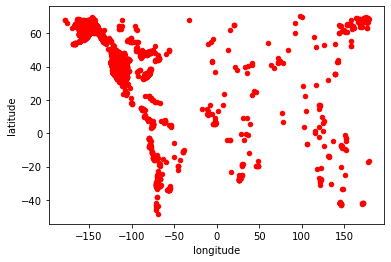

In [238]:
gold_prospect.plot(x="longitude", y="latitude", kind="scatter", c="red",
        colormap="YlOrRd")

In [239]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))

C:\Users\risha\AppData\Local\Temp\ipykernel_2468\2284452464.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


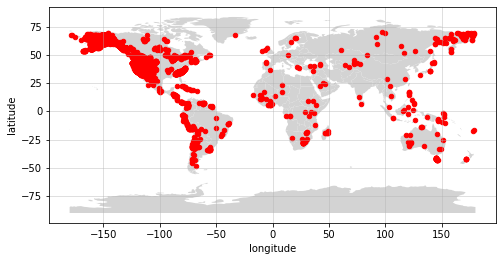

In [242]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey", ax=ax)
# parse dates for plot's title
# first_month = df["acq_date"].min().strftime("%b %Y")
# last_month = df["acq_date"].max().strftime("%b %Y")
# plot points
gold_prospect.plot(x="longitude", y="latitude", kind="scatter", 
        c="red", colormap="YlOrRd", 
#         title=f"Fires in Australia {first_month} to {last_month}", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

In [243]:
world_na = pd.read_csv('world_na (only north american countries.csv')

C:\Users\risha\AppData\Local\Temp\ipykernel_2468\3532480954.py:1: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  world_na = pd.read_csv('world_na (only north american countries.csv')


In [245]:
world_na.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [246]:
world_na

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite","Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,"Zinc, Gold",Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,"Copper, Lead",Unknown,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,NaN,Unknown,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,Mica Schist,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273418,Molango,20.83386,-98.73361,NaN,Mexico,Hidalgo,NaN,M,Manganese,NaN,NaN,Unknown,MARINE CHEMICAL SEDIMENT,NaN,Producer,NaN,NaN,"Tetzintla, Naopa, Acoxcatlan, Comextetintla De...",NaN,NaN,NaN
273419,Cuale District,20.38117,-105.10877,NaN,Mexico,Jalisco,NaN,NaN,"Copper, Gold, Silver, Lead, Zinc",NaN,NaN,Unknown,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN
273420,Agalteca,14.44527,-87.29280,NaN,Honduras,NaN,NaN,M,Iron,NaN,NaN,Unknown,"SKARN, REPLACEMENT",M,Prospect,NaN,NaN,"Group P, O, Q, C, B",NaN,NaN,NaN
273421,La Libertad Area,12.21347,-85.16665,NaN,Nicaragua,Chontales,NaN,NaN,Gold,Silver,"Lead, Arsenic, Antimony, Cadmium, Cobalt, Mang...",Unknown,"EPITHERMAL VEINS, SHEAR ZONES, VEIN",M,Producer,NaN,NaN,"San Juan Mine, Babilonia Mine, Chamarro Prospe...",INTERSECTIONS OF NE AND NW STRUCTURAL ELEMENTS...,NaN,NaN


In [247]:
world_na['dev_stat'].unique()

array(['Occurrence', 'Past Producer', 'Unknown', 'Prospect', 'Producer',
       'Plant'], dtype=object)

In [249]:
world_pros = world_na[world_na['dev_stat'] == 'Prospect']

In [250]:
world_pros

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
154,Double Anchor,56.06366,-130.25982,NaN,United States,Alaska,NaN,M,"Zinc, Lead, Copper, Gold, Silver",Copper,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Sphalerite",Quartz,Alaska State Mines Extension,NaN,Siltstone,NaN
155,Hummel,56.06477,-130.24370,NaN,United States,Alaska,NaN,M,"Copper, Lead, Zinc, Silver, Gold",NaN,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Sphalerite, Tetr...",Quartz,NaN,NaN,Argillite,NaN
156,Chickamin,56.07088,-130.27370,NaN,United States,Alaska,NaN,M,"Copper, Lead, Zinc",NaN,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Pyrrhotite, Tetr...",Quartz,NaN,NaN,Graywacke,NaN
157,Cathedral,56.07477,-130.28676,NaN,United States,Alaska,NaN,M,"Silver, Gold, Copper, Lead, Zinc",NaN,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Pyrrhotite, Spha...",Quartz,NaN,NaN,Siltstone,NaN
159,Blasher,56.05588,-130.26676,NaN,United States,Alaska,NaN,M,"Zinc, Lead, Molybdenum, Copper, Gold, Silver",NaN,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Galena, Pyrite, Pyrrhotite, Spha...",Quartz,Lone Star Group,NaN,Quartzite,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273401,Greasy Cove Mines,33.96684,-86.29997,NaN,United States,Alabama,"Etowah, St. Clair",M,Iron,NaN,NaN,Unknown,BEDDED,S,Prospect,NaN,NaN,NaN,NaN,NaN,NaN
273405,Watt Manganese District,33.29455,-85.97217,NaN,United States,Alabama,Clay,M,Manganese,NaN,NaN,Unknown,LATERITE,M,Prospect,NaN,NaN,NaN,NaN,NaN,NaN
273406,East Marengo County Lightweight Aggregate Dist...,32.19598,-87.65002,NaN,United States,Alabama,Marengo,N,Bloating Material,NaN,NaN,Unknown,BEDDED,L,Prospect,NaN,NaN,NaN,NaN,NaN,NaN
273412,Stateline (Gold Springs) District,37.41668,-113.80081,NaN,United States,Utah,Iron,M,"Lead, Silver, Gold",NaN,"Mercury, Molybdenum",Unknown,VEIN,NaN,Prospect,NaN,NaN,NaN,FAULTS,NaN,NaN
